# Measureing intensity on a surface

This example shows how to measure the intensity of a surface. The surface is defined by a set of points(vertices) and a set of triangles. The intensity is measured by averaging the intensity along the normal vectors of the vertices.

In [1]:
from napari_stress import sample_data, reconstruction, measurements, vectors
import numpy as np
import napari
import napari_process_points_and_surfaces as nppas

## Example data

We first need to create a surface. In this tutorial, we take the 3d image of the 4d droplet sample dataset and quickly reconstruct a surface from it using the [droplet reconstruction toolbox](toolboxes:droplet_reconstruction:from_code).

In [2]:
viewer = napari.Viewer()

In [3]:
droplet = sample_data.get_droplet_4d()[0][0][0]  # take only first timepoint
result = reconstruction.reconstruct_droplet(droplet, voxelsize=np.asarray([2,1,1]),
                                            target_voxelsize=1,
                                            interpolation_method='linear',
                                            resampling_length=1)

viewer.add_layer(napari.layers.Layer.create(result[3][0], result[3][1], result[3][2]))
viewer.add_layer(napari.layers.Layer.create(result[0][0], result[0][1], result[0][2]))

<Image layer 'Rescaled image' at 0x18bc3dbb970>

We now create surface from the reconstructed points:

In [4]:
surface = nppas.reconstruct_surface_from_pointcloud(result[3][0], point_influence_radius=3)
surface_smoothed = nppas.smooth_surface(surface, number_of_iterations=50)
surface_decimated = nppas.decimate_quadric(surface_smoothed, fraction=0.01)
viewer.add_surface(surface_decimated, name='surface')

<Surface layer 'surface' at 0x18bc7e98850>

We now measure intensity on the surface. The measured values are simply the intensities on the surface. We can add some more metrics (mean, std, min, max) to results:

In [7]:
measured_intensities = measurements.measure_intensity_on_surface(surface_decimated,
                                                                 result[0][0].squeeze(),
                                                                 measurement_range = 3,
                                                                 sampling_distance=0.5, interpolation_method='linear')

intensity_mean = measured_intensities.mean(axis=1)
intensity_std = measured_intensities.std(axis=1)
intensity_max = measured_intensities.max(axis=1)
intensity_min = measured_intensities.min(axis=1)

measured_intensities['intensity_mean'] = intensity_mean
measured_intensities['intensity_std'] = intensity_std
measured_intensities['intensity_max'] = intensity_max
measured_intensities['intensity_min'] = intensity_min
measured_intensities

,step_0,step_1,step_2,step_3,step_4,step_5,intensity_mean,intensity_std,intensity_max,intensity_min
0,138.580632,118.521176,94.456963,69.889871,45.115587,27.923313,82.414590,42.709980,138.580632,27.923313
1,139.952183,118.133986,93.448055,68.379155,43.191392,26.893549,81.666386,43.641419,139.952183,26.893549
2,141.532420,119.633567,94.796062,69.503891,44.095890,27.564878,82.854451,43.990476,141.532420,27.564878
3,141.005646,119.697975,95.536208,70.404579,44.983290,28.205731,83.305572,43.530034,141.005646,28.205731
4,144.094378,122.267851,97.474136,71.917879,46.116998,29.058514,85.154959,44.382379,144.094378,29.058514
...,...,...,...,...,...,...,...,...,...,...
3808,145.649327,122.636668,97.269848,68.667453,44.320391,26.201119,84.124134,46.086217,145.649327,26.201119
3809,143.454825,121.000060,96.102850,68.005850,44.238060,26.128851,83.155083,45.237089,143.454825,26.128851
3810,146.052315,123.021791,97.396168,68.650765,44.559273,26.140336,84.303441,46.240687,146.052315,26.140336
3811,147.172818,124.112441,98.574141,69.787065,45.166199,26.961570,85.295706,46.401723,147.172818,26.961570


In [8]:
viewer.add_surface((surface_decimated[0], surface_decimated[1], measured_intensities['intensity_max'].values),
                   name='surface_intensity_max', colormap='inferno')

<Surface layer 'surface_intensity_max' at 0x18bc7e4bd60>

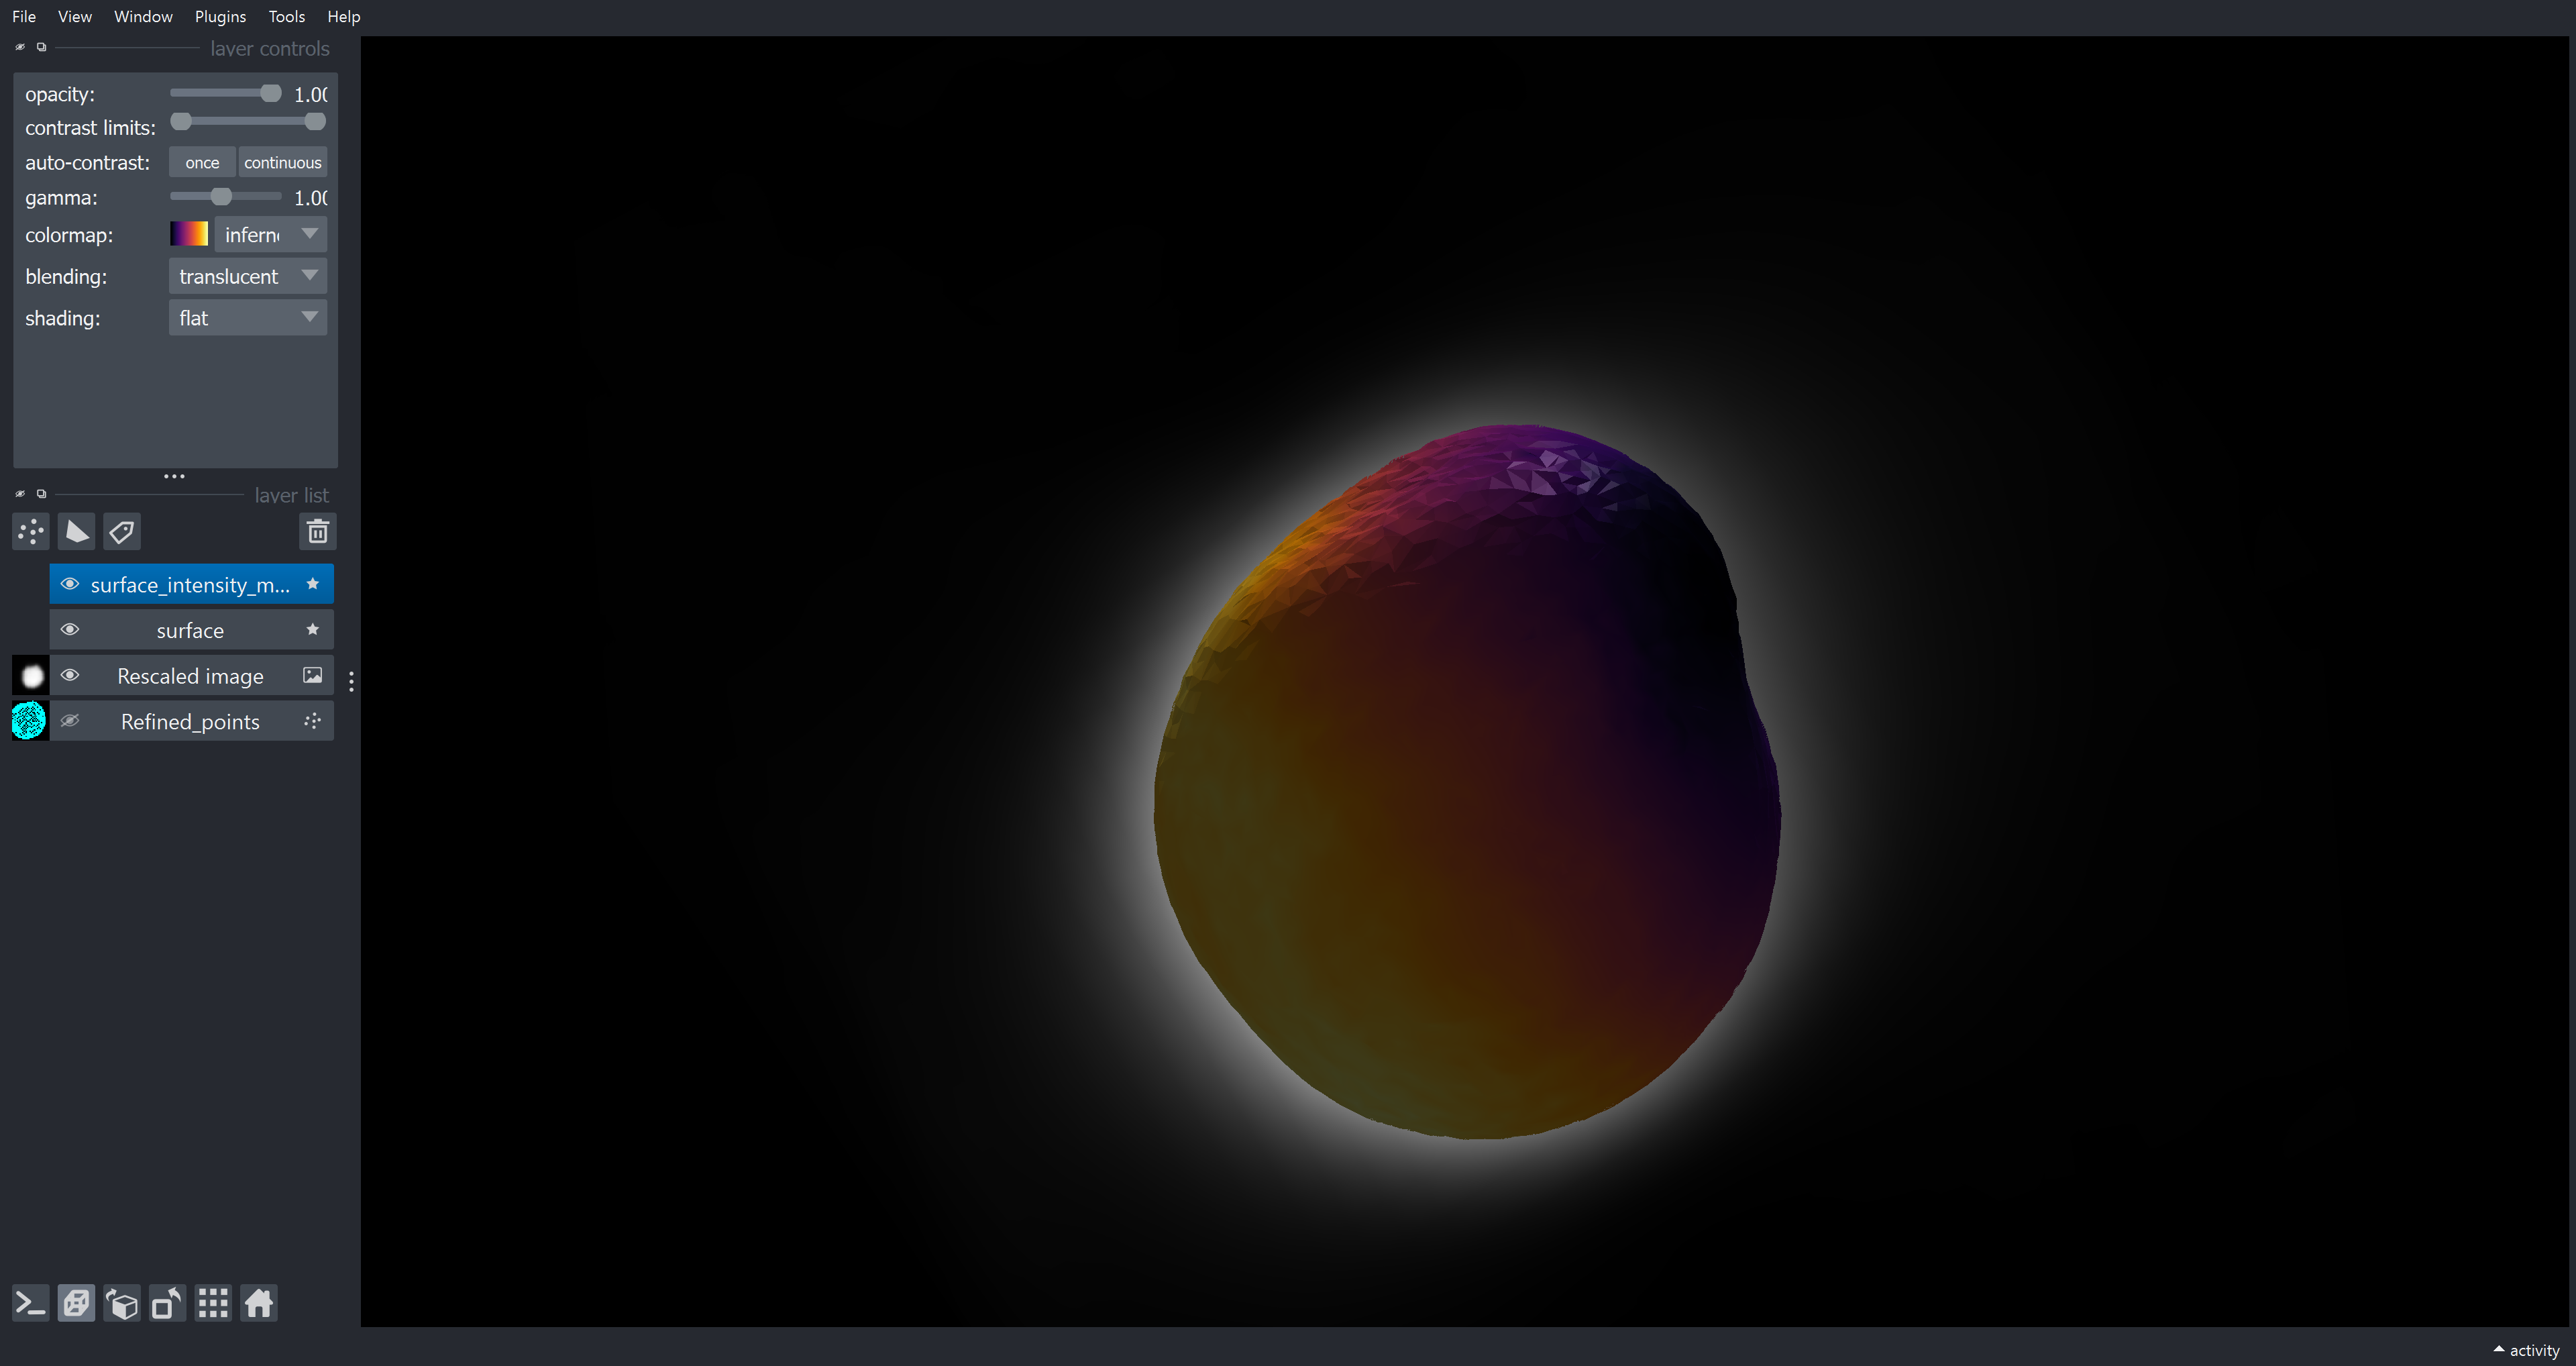

In [9]:
napari.utils.nbscreenshot(viewer)